<a href="https://colab.research.google.com/github/NU-MSE-LECTURES/465-WINTER2026/blob/main/Week_02/exercises/exercise_02_hyperspy_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 02: HyperSpy Fundamentals

Practice working with HyperSpy signals, axes, and basic operations.


In [ ]:
# Colab setup
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab. Installing requirements...")
    !pip install hyperspy ase py4DSTEM
    !git clone https://github.com/NU-MSE-LECTURES/465_Computational_Microscopy_2026.git
    print("Setup complete.")
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab.")

## Exercise 1: Loading and Inspecting a Signal

**Task:**
1. Import HyperSpy.
2. Create a synthetic 2D image signal (e.g., 100x100 pixels) with some pattern (like a Gaussian).
3. Print the signal's shape, data type, and axes information.
4. Plot the signal.

Shape: (100, 100)
Data Type: float64

Axes Information:
<Axes manager, axes: (|100, 100)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
---------------- | ------ | ------ | ------- | ------- | ------ 
          x-axis |    100 |      0 |     -50 |       1 |     nm 
          y-axis |    100 |      0 |     -50 |       1 |     nm 


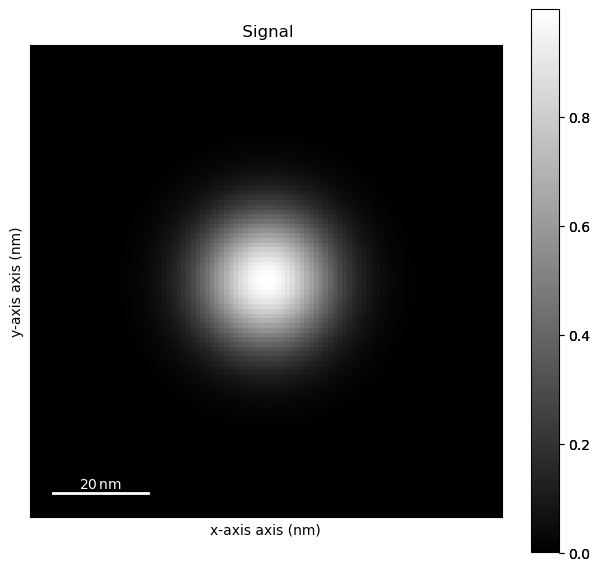

In [40]:
# Your code
#Used Gemini to help generate code and explain functions
#1. Import HyperSpy.
import hyperspy.api as hp
import numpy as np


#2. Create a synthetic 2D image signal (e.g., 100x100 pixels) with some pattern (like a Gaussian).
size = 100
sigma = 10 #width of gaussian

x, y = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size)) #makes a grid (-1 to 1 for x and y) scale which has 100 intervals
d = np.sqrt(x*x + y*y) #distance from center
gaussian_pattern = np.exp(-(d**2 / (2.0 * sigma**2))) #gaussian function as a function of the distance from center
signal = hp.signals.Signal2D(gaussian_pattern)
#3. Print the signal's shape, data type, and axes information.

#all axes information
signal.axes_manager[0].name = 'x-axis'
signal.axes_manager[0].scale = 1
signal.axes_manager[0].offset = -50
signal.axes_manager[0].units = 'nm'
signal.axes_manager[1].name = 'y-axis'
signal.axes_manager[1].scale = 1
signal.axes_manager[1].offset = -50
signal.axes_manager[1].units = 'nm'

print(f"Shape: {signal.data.shape}")
print(f"Data Type: {signal.data.dtype}")
print("\nAxes Information:")
print(signal.axes_manager)

#4. Plot the signal.
signal.plot()

## Exercise 2: Working with Axes

**Task:**
1. Create a 1D signal (e.g., a spectrum) with 1024 points.
2. Set the axis scale to energy (eV) with a scale of 0.1 eV per point and offset of 0.
3. Add some peaks to the spectrum (e.g., Gaussian peaks).
4. Plot the spectrum with proper axis labels.

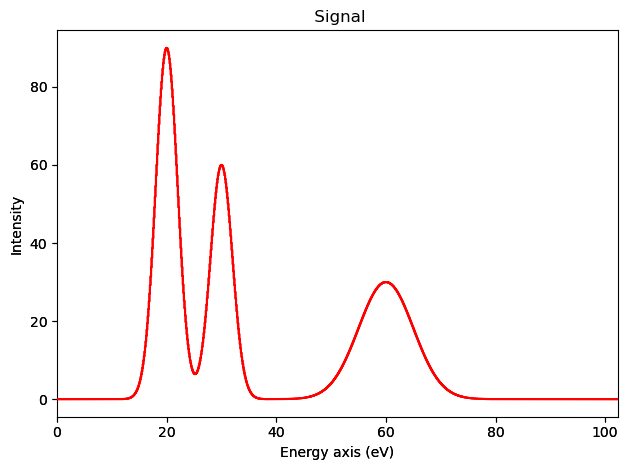

In [65]:
# Your code here
#Used Gemini to help generate code and explain functions
import hyperspy.api as hs
import numpy as np

data = np.zeros(1024) #1024 blank units
signal = hs.signals.Signal1D(data)

signal.axes_manager[0].name = 'Energy' #axis name
signal.axes_manager[0].units = 'eV' #axis units
signal.axes_manager[0].scale = 0.1 #scale
signal.axes_manager[0].offset = 0 #offset

#gaussian function that has variables x (unit on our 1D array), amplitude (amp), center (center), width (wid)
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

#calling our 1D array unit "x"
x = signal.axes_manager[0].axis

# Add two peaks: one at 30 eV and one at 80 eV
signal.data += gaussian(x, amp=60, cen=30, wid=2)
signal.data += gaussian(x, amp=30, cen=60, wid=5)
signal.data += gaussian(x, amp=90, cen=20, wid=2)
# 4. Plot the spectrum
signal.plot()

## Exercise 3: Signal Operations

**Task:**
1. Create two 2D signals with different patterns.
2. Perform basic operations: addition, subtraction, multiplication.
3. Apply a filter (e.g., Gaussian blur) to one signal.
4. Compare the original and filtered signals.

WARNING | Hyperspy | Axes labels were requested, but one or both of the axes units and/or name are undefined. Axes decorations have been set to 'ticks' instead. (hyperspy.drawing.utils:1234)


[<Axes: title={'center': 'Original'}>, <Axes: title={'center': 'Filtered'}>]

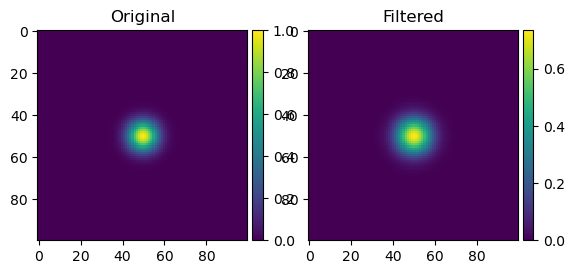

In [91]:
import hyperspy.api as hs
import numpy as np

#Gaussian 2D Signal
data1 = np.fromfunction(lambda y, x: np.exp(-((x-50)**2 + (y-50)**2)/50), (100, 100))
s1 = hs.signals.Signal2D(data1)
s1.metadata.General.title = "Gaussian Peak"

#Exponentials 2D Signal
data2 = np.fromfunction(lambda y, x: x**2 + y**2 , (100, 100))
s2 = hs.signals.Signal2D(data2)
s2.metadata.General.title = "Exponentials"

s_add = s1 + s2
s_sub = s2 - s1
s_mul = s1 * s2

from scipy.ndimage import gaussian_filter

# Use map to apply the scipy filter to the signal data
s1_filtered = s1.map(gaussian_filter, sigma=3, inplace=False)
s1_filtered.metadata.General.title = "Filtered Gaussian"

# Comparison Plot
hs.plot.plot_images([s1, s1_filtered], cmap='viridis', label=['Original', 'Filtered'])



## Exercise 4: Saving and Loading

**Task:**
1. Save one of your signals to a file (e.g., .hspy format).
2. Load it back and verify the data is the same.
3. Export a plot as an image file.

/Users/ginocangialosi/miniconda3/envs/MATSCI465_GinoCangialosi/lib/python3.13/site-packages/rsciio/utils/rgb_tools.py:62: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(


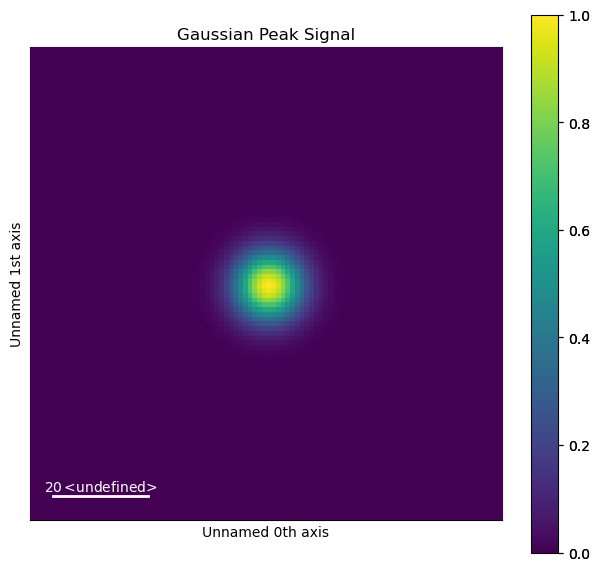

In [103]:
# Your code here

s1.plot(cmap='viridis')
s1.save('processed_gaussian', overwrite=True, compression='gzip')
s1_load = hs.load('s1_signal_data.hspy')
plt.savefig("gaussian_plot.png", dpi=300)